In [66]:
# Import necessary python libraries
import pandas as pd
import numpy as np
import networkx as nx  
import json
import random
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [67]:
# read in JSON into array of arrays
dataset=[]
with open('train.json') as json_file:
    data = json.load(json_file)
    for recipe in data:
        dataset.append(recipe['ingredients'])
for recipe in dataset:
    print(recipe)

['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']
['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil']
['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers']
['water', 'vegetable oil', 'wheat', 'salt']
['black pepper', 'shallots', 'cornflour', 'cayenne pepper', 'onions', 'garlic paste', 'milk', 'butter', 'salt', 'lemon juice', 'water', 'chili powder', 'passata', 'oil', 'ground cumin', 'boneless chicken skinless thigh', 'garam masala', 'double cream', 'natural yogurt', 'bay leaf']
['plain flour', 'sugar', 'butter', 'eggs', 'fresh ginger root', 'salt', 'ground cinnamon', 'milk', 'vanilla extract', 'ground ginger', 'powdered sugar', 'baking powder']
['olive oil', 'salt', 'medium

['pitted kalamata olives', 'extra-virgin olive oil', 'garlic cloves', 'sherry vinegar', 'country style bread', 'cherry tomatoes', 'salt', 'large shrimp', 'fresh basil', 'teardrop tomatoes', 'freshly ground pepper']
['beer', 'self rising flour', 'shredded cheddar cheese', 'white sugar', 'chile pepper']
['nutmeg', 'whole wheat flour', 'baking powder', 'sausages', 'pepper', 'gravy', 'salt', 'whole wheat pastry flour', 'baking soda', 'butter', 'biscuits', 'milk', 'sweet potatoes', 'maple syrup']
['unsalted chicken stock', 'cilantro stems', 'all-purpose flour', 'ground cumin', 'avocado', 'salsa verde', 'reduced-fat sour cream', 'corn tortillas', 'tomatoes', 'jalapeno chilies', 'cilantro leaves', 'onions', 'reduced fat sharp cheddar cheese', 'chicken breasts', 'garlic cloves']
['vanilla', 'oil', 'whole milk', 'cream cheese', 'rolls', 'sour cream', 'whipped cream', 'condensed milk']
['cream of chicken soup', 'green chilies', 'milk', 'cooked chicken', 'sour cream', 'shredded cheddar cheese', '

['fish sauce', 'peanut oil', 'ground chicken breast', 'minced garlic', 'fresh basil leaves', 'dark soy sauce', 'thai chile']
['tapioca flour', 'salt', 'whole milk', 'parmesan cheese', 'eggs', 'vegetable oil']
['tofu', 'water', 'kimchi', 'sugar', 'sesame oil', 'pepper flakes', 'green onions', 'pork belly', 'Gochujang base']
['olive oil', 'fresh orange juice', 'orange rind', 'fresh basil', 'parmigiano reggiano cheese', 'vegetable broth', 'pinenuts', 'butter', 'garlic cloves', 'ground black pepper', 'orzo']
['evaporated milk', 'all-purpose flour', 'egg yolks', 'vinegar', 'sugar', 'dry mustard']
['white vinegar', 'tortilla chips', 'iceberg lettuce', 'bell pepper', 'ground turkey', 'scallion greens', 'taco seasoning reduced sodium', 'vegetable oil', 'extra sharp cheddar cheese']
['pork', 'bacon', 'ground allspice', 'onions', 'eggs', 'water', 'salt', 'sour cream', 'pepper', 'whipping cream', 'garlic cloves', 'shortening', 'beef bouillon granules', 'all-purpose flour', 'fresh parsley']
['acti

['caraway seeds', 'extra-virgin olive oil', 'self rising flour', 'fresh dill', 'whole milk']
['garam masala', 'salt', 'ground cumin', 'spinach', 'ginger', 'cooking fat', 'coriander powder', 'yellow onion', 'pepper', 'garlic', 'ground turmeric']
['chicken broth', 'pepper', 'red curry paste', 'granny smith apples', 'olive oil', 'boneless skinless chicken breast halves', 'ground cinnamon', 'sweet onion', 'red bell pepper', 'plain yogurt', 'salt']
['ground black pepper', 'ricotta', 'kosher salt', 'grated parmesan cheese', 'large eggs', 'sauce', 'large egg yolks', 'all-purpose flour']
['water', 'garlic cloves', 'onions', 'dry sherry', 'red bell pepper', 'red wine vinegar', 'cucumber', 'plum tomatoes', 'country white bread', 'extra-virgin olive oil', 'fresh parsley']
['ground black pepper', 'chees fresh mozzarella', 'red bell pepper', 'spinach', 'shallots', 'garlic cloves', 'Italian cheese', 'balsamic vinegar', 'fresh lemon juice', 'fresh basil', 'cooking spray', 'salt', 'shiitake mushroom c

['cooked chicken', 'cumin', 'flour tortillas', 'salsa', 'shredded cheddar cheese', 'vegetable oil', 'guacamole', 'sour cream']
['iceberg', 'water chestnuts', 'sesame oil', 'roasted peanuts', 'soy sauce', 'Sriracha', 'lettuce leaves', 'salt', 'fresh ginger', 'mung bean noodles', 'garlic', 'onions', 'ground chicken', 'hoisin sauce', 'green onions', 'rice vinegar']
['salsa', 'pinto beans', 'black beans', 'whole kernel corn, drain', 'chopped cilantro fresh', 'red chili peppers', 'cream cheese', 'boneless skinless chicken breast halves', 'diced tomatoes', 'taco seasoning', 'ground cumin']
['ground ginger', 'plain yogurt', 'flaked coconut', 'oil', 'ground turmeric', 'ground cinnamon', 'bananas', 'garlic', 'onions', 'tomato sauce', 'ground black pepper', 'salt', 'white sugar', 'tomatoes', 'curry powder', 'chili powder', 'curry paste', 'ground cumin']
['tomatoes', 'garlic', 'Anaheim chile', 'chopped cilantro fresh', 'green onions', 'pepper', 'salt']
['water', 'salt', 'unsalted butter', 'hot pe

['kosher salt', 'vegetable oil', 'water', 'butter', 'mozzarella cheese', 'queso fresco', 'arepa flour']
['fat free less sodium chicken broth', 'dry white wine', 'heavy whipping cream', 'arborio rice', 'ground black pepper', 'salt', 'water', 'butter', 'parmigiano-reggiano cheese', 'asparagus', 'chopped onion']
['apple juice', 'sugar', 'salt', 'grape juice']
['ground black pepper', 'cold cut', 'fresh basil', 'balsamic vinegar', 'extra-virgin olive oil', 'genoa salami', 'roasted red peppers', 'tapenade', 'prosciutto', 'fresh mozzarella', 'ciabatta']
['fontina cheese', 'fresh parmesan cheese', 'all-purpose flour', 'butter-margarine blend', 'cheese', 'evaporated skim milk', 'pepper', 'salt', 'fresh basil', 'cooked rigatoni', 'crumbled gorgonzola']
['chili powder', 'black pepper', 'creole seasoning', 'garlic powder', 'onion powder']
['salad greens', 'Italian cheese', 'purple onion', 'pepperoni slices', 'pimentos', 'water', 'italian salad dressing']
['butter', 'fresh parsley', 'french baguett

['roasted cashews', 'kale', 'shallots', 'garlic cloves', 'ground cumin', 'tumeric', 'extra firm tofu', 'Thai red curry paste', 'fresh lime juice', 'brown sugar', 'fresh ginger', 'sea salt', 'coconut milk', 'lime zest', 'water', 'sweet potatoes', 'creamy peanut butter', 'canola oil']
['curry powder', 'salt', 'red lentils', 'vegetable stock', 'oil', 'garam masala', 'broccoli', 'black pepper', 'garlic', 'onions']
['kosher salt', 'cheese', 'thyme', 'onions', 'dry vermouth', 'shallots', 'garlic cloves', 'bay leaf', 'unsalted butter', 'white wine vinegar', 'country bread', 'low sodium chicken broth', 'freshly ground pepper', 'flat leaf parsley']
['powdered sugar', 'superfine sugar', 'cinnamon', 'oil', 'melted butter', 'warm water', 'granulated sugar', 'salt', 'food colouring', 'unsalted butter', 'vanilla extract', 'sour cream', 'eggs', 'active dry yeast', 'whole milk', 'all-purpose flour']
['part-skim mozzarella cheese', 'garlic cloves', 'fat-free mayonnaise', 'pepper', 'worcestershire sauce

['serrano peppers', 'sweet pepper', 'shredded Monterey Jack cheese', 'white corn tortillas', 'vegetable oil', 'sour cream', 'tomatoes', 'lime wedges', 'nonstick spray', 'fresh cilantro', 'cilantro', 'onions']
['black peppercorns', 'dry white wine', 'yellow onion', 'olive oil', 'chopped celery', 'bay leaf', 'water', 'garlic', 'thyme', 'ground black pepper', 'salt', 'fish']
['shortening', 'cake flour', 'sour cream', 'ground nutmeg', 'all-purpose flour', 'granny smith apples', 'salt', 'white sugar', 'eggs', 'unsalted butter', 'lemon juice']
['large eggs', 'maple syrup', 'granulated sugar', 'buttermilk', 'baking soda', 'butter', 'all-purpose flour', 'kosher salt', 'vegetable oil', 'jam']
['brown sugar', 'baking soda', 'vegetable oil', 'Frangelico', 'whole wheat flour', 'cooking spray', 'coffee beans', 'large egg whites', 'large eggs', 'all-purpose flour', 'unsweetened cocoa powder', 'roasted hazelnuts', 'granulated sugar', 'salt', 'instant espresso']
['chili powder', 'onions', 'green chile

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['chicken stock', 'olive oil', 'diced tomatoes', 'freshly ground pepper', 'medium shrimp', 'dried oregano', 'cooked ham', 'red wine vinegar', 'salt', 'fat', 'frozen peas', 'white wine', 'lemon', 'yellow onion', 'flat leaf parsley', 'long grain white rice', 'green bell pepper', 'green onions', 'shells', 'garlic cloves', 'bone in skin on chicken thigh']
['part-skim mozzarella cheese', 'garlic cloves', 'fresh basil', 'acorn squash', 'onions', 'basil', 'orange rind', 'olive oil', 'freshly ground pepper', 'plum tomatoes']
['garlic powder', 'old bay seasoning', 'salt', 'pepper', 'onion powder', 'white rice', 'shrimp', 'chicken broth', 'chicken breasts', 'paprika', 'cayenne pepper', 'water', 'red pepper flakes', 'smoked sausage', 'bay leaf']
['coconut meat', 'corn starch', 'jackfruit', 'condensed milk', 'corn kernel whole', 'grating cheese', 'coconut milk', 'evaporated milk', 'butter oil']
['butter', 'pecans', 'all-purpose flour', 'cold water', 'vanilla extract', 'sugar']
['water', 'green oni

In [68]:
# Transform your data for the apriori algorithm
encoder = TransactionEncoder()
arr = encoder.fit(dataset).transform(dataset)
df = pd.DataFrame(arr, columns=encoder.columns_)

In [69]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.116458,(all-purpose flour)
1,0.066048,(black pepper)
2,0.121864,(butter)
3,0.070750,(carrots)
4,0.051189,(chili powder)
5,0.085181,(eggs)
6,0.069065,(extra-virgin olive oil)
7,0.185548,(garlic)
8,0.156786,(garlic cloves)
9,0.077387,(green onions)


In [70]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence']])
rules.iloc[1]['antecedents']

              antecedents      consequents   support  confidence
0     (all-purpose flour)           (salt)  0.077412    0.664724
1                (butter)           (salt)  0.069819    0.572932
2                (garlic)      (olive oil)  0.052295    0.281843
3             (olive oil)         (garlic)  0.052295    0.260946
4                (garlic)         (onions)  0.066853    0.360298
5                (onions)         (garlic)  0.066853    0.333542
6                (garlic)           (salt)  0.094258    0.507995
7                  (salt)         (garlic)  0.094258    0.207724
8             (olive oil)  (garlic cloves)  0.052798    0.263455
9         (garlic cloves)      (olive oil)  0.052798    0.336754
10        (garlic cloves)           (salt)  0.075300    0.480276
11  (ground black pepper)           (salt)  0.068738    0.571488
12               (onions)      (olive oil)  0.055489    0.276844
13            (olive oil)         (onions)  0.055489    0.276879
14                 (salt)

frozenset({'butter'})

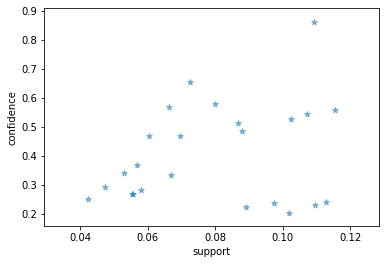

In [71]:
support=rules['support'].values
confidence=rules['confidence'].values
for i in range (len(support)):
   support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
   confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
 
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [87]:
def draw_graph(rules, rules_to_show):
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)       
   
  for i in range(rules_to_show): 
    G1.add_node("R"+str(i))
    
    for a in rules.iloc[i]['antecedents']:
        G1.add_node(a)
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_node(c)
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
C:\Users\Remi\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


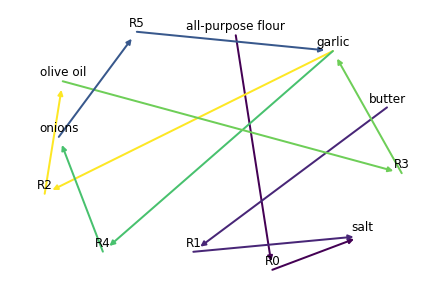

In [88]:
draw_graph(rules, 6)